In [2]:
import glob
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter

In [3]:
seg_path = '../data/main/seg/*.png'

In [74]:
filenames = glob.glob(seg_path)
filenames = filenames[round(len(filenames) * 0): round(len(filenames) * 0.5)]

In [75]:
len(filenames)

186

In [76]:
classdict = {0:'others', 1:'rover', 17:'sky', 33:'car', 34:'motorbicycle', 35:'bicycle', 36:'person', 37:'rider', 38:'truck', 39:'bus', 40:'tricycle', 49:'road', 50:'siderwalk', 65:'traffic_cone'}

In [77]:
def g(path):
    image = Image.open(path)
    image = np.array(image)
    akk = np.unique(image)
    
    unique, counts = np.unique(akk // 1000, return_counts=True)
#     print(unique)
#     print(counts)
    
    return dict(zip(unique, counts))

In [78]:
res = Counter()
for path in filenames:
    res += Counter(g(path))

In [79]:
df = pd.DataFrame.from_dict(res, orient='index').transpose()
df.rename(columns=classdict, inplace=True)
df.drop(['others', 'rider', 'traffic_cone', 'bicycle', 'tricycle'], axis=1, inplace=True)

In [80]:
df

,car,motorbicycle,person,bus,truck
0,1856,70,571,135,114


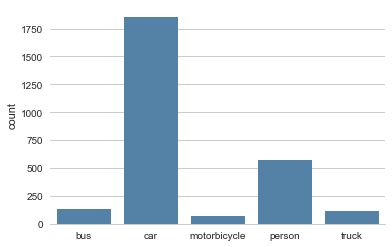

In [81]:
classes_df = pd.melt(df)
groups = classes_df.groupby('variable')
sums = groups.sum()


sns.set(style='whitegrid')
ax = sns.barplot(x=sums.index, y=sums.value, color='steelblue')
ax.set(xlabel='', ylabel='count')
sns.despine(left=True)
plt.show()
fig = ax.get_figure()
fig.set_size_inches(18.5, 10.5)
fig.savefig("all_distr.png")